In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/bryanwang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# reverse order so earliest dates first
avoid_large_events = pd.read_csv('Gallup Poll responses - avoid_large_events.csv', index_col='Date')[::-1]
avoid_plane = pd.read_csv('Gallup Poll responses - avoid_plane.csv', index_col='Date')[::-1]
avoid_public_places = pd.read_csv('Gallup Poll responses - avoid_public_places.csv', index_col='Date')[::-1]
avoid_small_gatherings = pd.read_csv('Gallup Poll responses - avoid_small_gatherings.csv', index_col='Date')[::-1]

covid_better_worse = pd.read_csv('Gallup Poll responses - covid_better_worse.csv', index_col='Date')[::-1]
isolation_effort = pd.read_csv('Gallup Poll responses - isolation_effort.csv', index_col='Date')[::-1]
stocked_up = pd.read_csv('Gallup Poll responses - stocked_up.csv', index_col='Date')[::-1]
wore_mask = pd.read_csv('Gallup Poll responses - wore_mask.csv', index_col='Date')[::-1]
worry = pd.read_csv('Gallup Poll responses - worry.csv', index_col='Date')[::-1]
stay_home = pd.read_csv('Gallup Poll responses - stay_home.csv', index_col='Date')[::-1]

felt_anger = pd.read_csv('Gallup Poll responses - felt_anger.csv', index_col='Date')[::-1]
felt_anxiety = pd.read_csv('Gallup Poll responses - felt_anxiety.csv', index_col='Date')[::-1]
felt_boredom = pd.read_csv('Gallup Poll responses - felt_boredom.csv', index_col='Date')[::-1]
felt_depression = pd.read_csv('Gallup Poll responses - felt_depression.csv', index_col='Date')[::-1]
felt_enjoyment = pd.read_csv('Gallup Poll responses - felt_enjoyment.csv', index_col='Date')[::-1]
felt_happiness = pd.read_csv('Gallup Poll responses - felt_happiness.csv', index_col='Date')[::-1]
felt_loneliness = pd.read_csv('Gallup Poll responses - felt_loneliness.csv', index_col='Date')[::-1]
felt_sadness = pd.read_csv('Gallup Poll responses - felt_sadness.csv', index_col='Date')[::-1]
felt_stress = pd.read_csv('Gallup Poll responses - felt_stress.csv', index_col='Date')[::-1]
felt_worry = pd.read_csv('Gallup Poll responses - felt_worry.csv', index_col='Date')[::-1] 

# covid case data
covid = pd.read_csv('owid-covid-data.csv')

In [5]:
covid_targets = ['new_cases', 'new_deaths', 'weekly_hosp_admissions', 
                 'new_tests', 'positive_rate', 'tests_per_case']
covid_titles = ['New Cases', 'New Deaths', 'Weekly Hospital Admissions', 
                 'New Tests', 'Positive Rate', 'Tests Per Case']

/var/folders/6t/m8p7kvf97cd38j154jl_hcx00000gn/T/ipykernel_6112/2896062682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_US['date'] = pd.to_datetime(covid_US['date'])


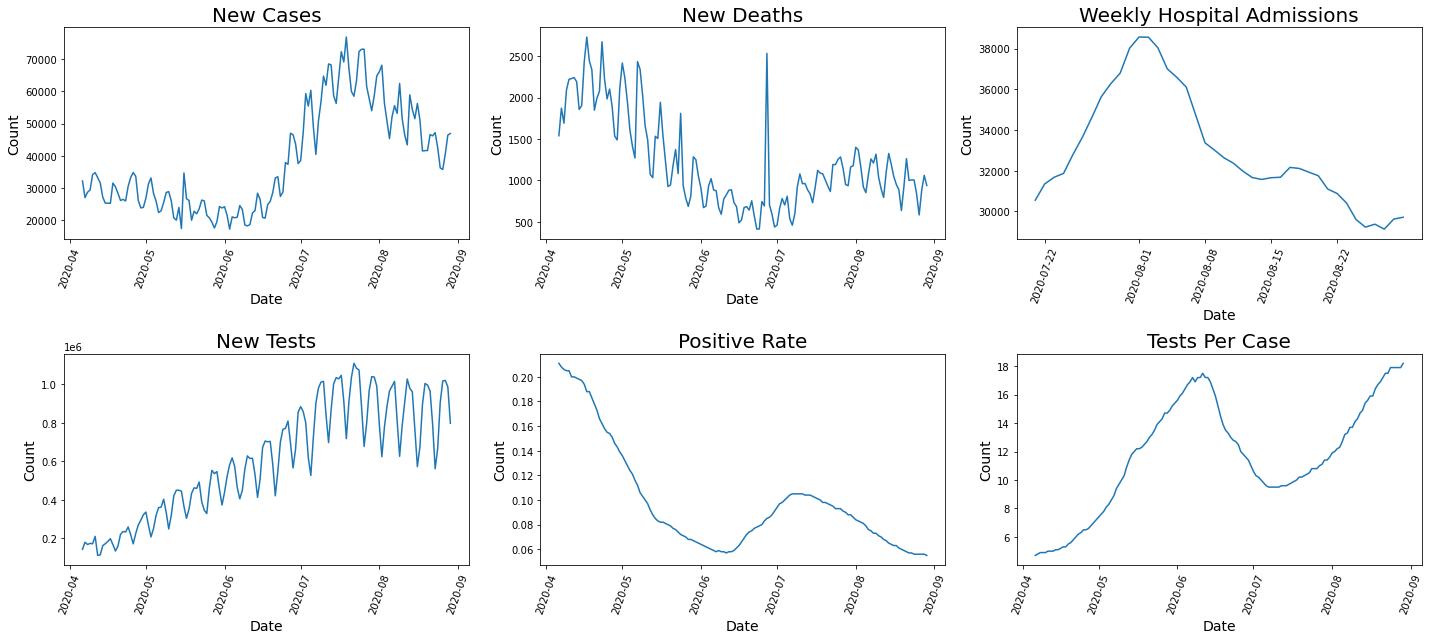

In [6]:
# covid_cases['location']=='United States' returns a boolean array of len = len(covid_cases):
# It checks each element in the column 'location' of covid_cases and see if it equals 'United States.'

covid_US = covid.loc[covid['location']=='United States']

covid_US['date'] = pd.to_datetime(covid_US['date'])
covid_US = covid_US.loc[covid_US['date']>='2020-04-06']
covid_US = covid_US.loc[covid_US['date']<'2020-08-30']

#num_targets = len(covid_targets)
fig, axes= plt.subplots(2, 3, figsize=(20, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for ax, target, title in zip(axes.flatten(), covid_targets, covid_titles):
    sns.lineplot(data=covid_US, x='date', y=target, ax=ax)
    ax.tick_params(axis='x', rotation=70) 
   
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    
        
fig.savefig('figures_covid', bbox_inches='tight')        

plt.tight_layout()
plt.show()  


#fig = plt.figure(figsize=(16, 8))
#sns.lineplot(data=covid_US, x='date', y='new_cases')

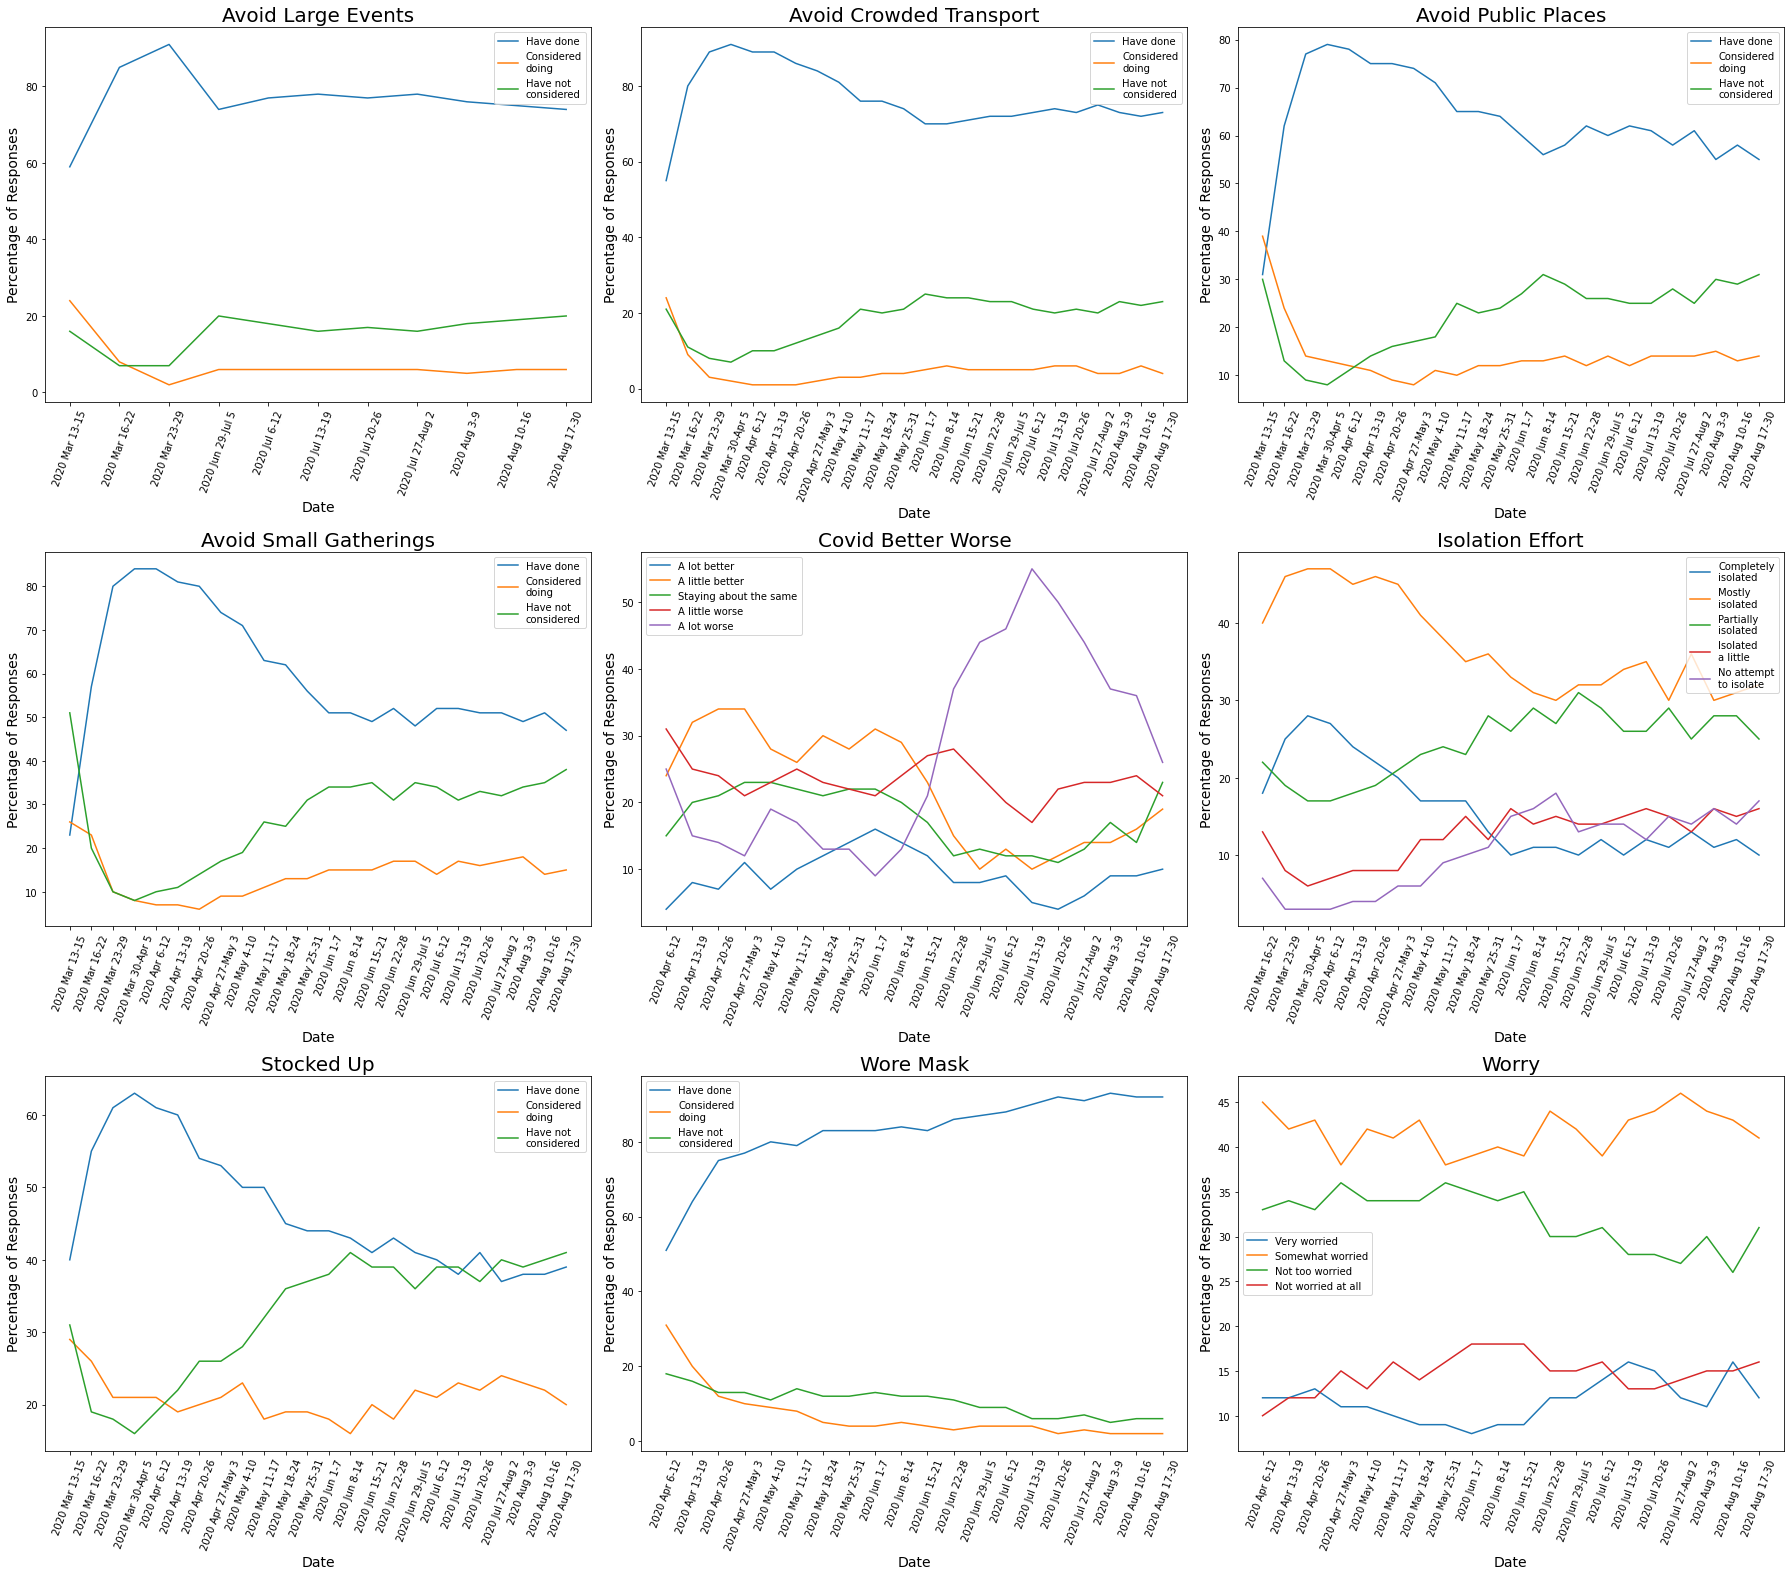

In [13]:
covid_sentiments = [avoid_large_events, avoid_plane, avoid_public_places, 
                    avoid_small_gatherings, covid_better_worse, isolation_effort, 
                    stocked_up, wore_mask, worry]

titles = ['Avoid Large Events', 'Avoid Crowded Transport', 'Avoid Public Places',
          'Avoid Small Gatherings', 'Covid Better Worse', 'Isolation Effort',
          'Stocked Up', 'Wore Mask', 'Worry']

fig, axes= plt.subplots(3, 3, figsize=(25, 22))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for ax, title, sentiment in zip(axes.flatten(), titles, covid_sentiments):
    for degree in sentiment.columns:
        sns.lineplot(data=sentiment, x='Date', y=degree, ax=ax, label=degree)
        ax.tick_params(axis='x', rotation=70) 
        
        
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Percentage of Responses', fontsize=14)
    
fig.savefig('figures_covid_sentiments', bbox_inches='tight')      
        
plt.tight_layout()
plt.show()       

Over time, precaution goes down, as seen in most of the graphs. However, covid_better_worse and wore_mask both stand out. For covid_better_worse, the purple line (those who think COVID is getting a LOT worse) SPIKES in the summer of 2020. Moreover, mask wearing has consistently gone up between April and August of 2020. 

Spike in covid_worse_better partially because it's actually getting worse, partially because people want to think it's getting A LOT worse because everyone else is. (but they don't actually believe it's A LOT worse. Otherwise, their behavior would change more. But it doesn't!)

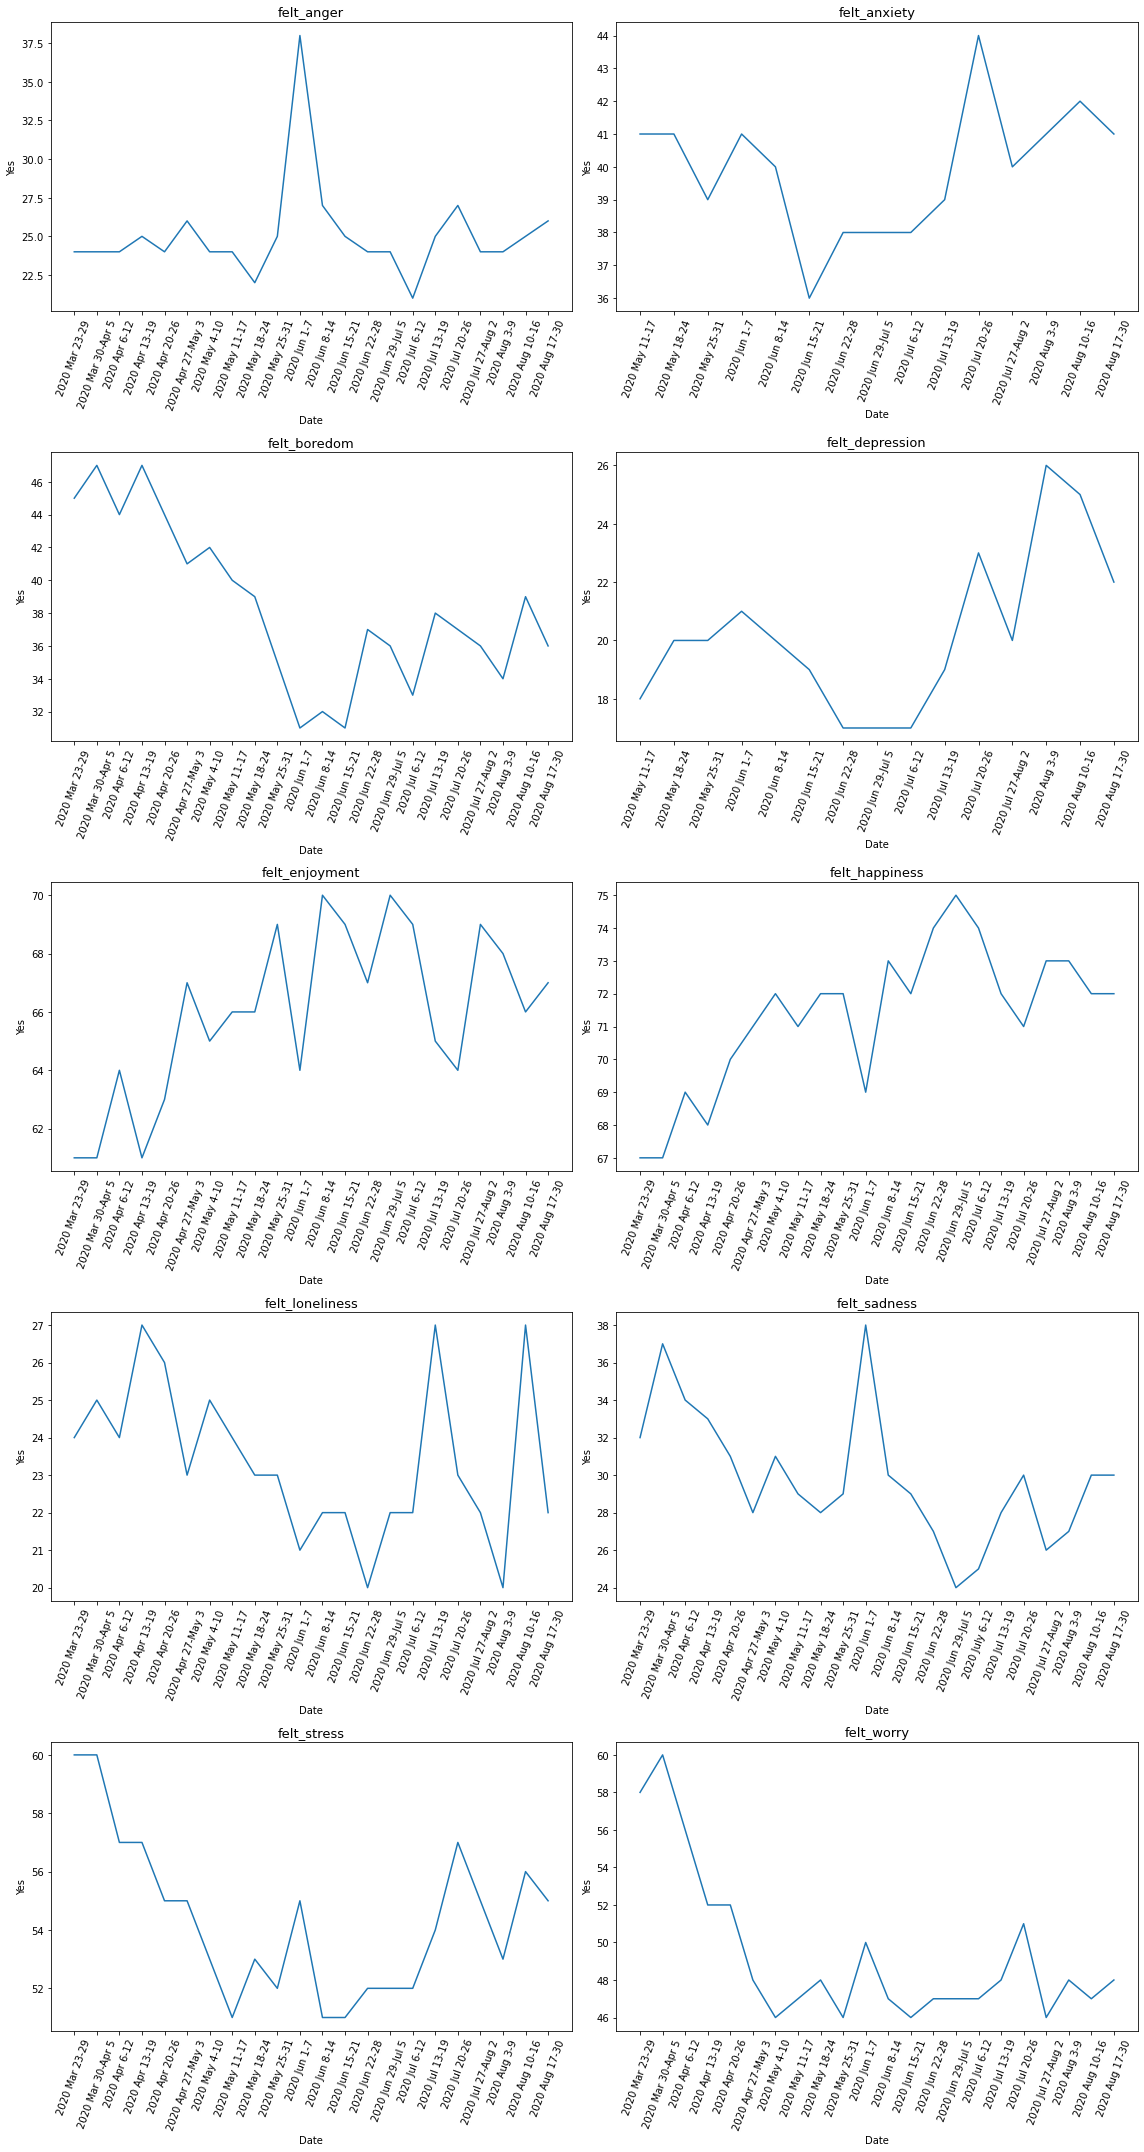

In [32]:
covid_sentiments = [felt_anger, felt_anxiety, felt_boredom, 
                    felt_depression, felt_enjoyment, felt_happiness, 
                    felt_loneliness, felt_sadness, felt_stress, felt_worry]

titles = ['felt_anger', 'felt_anxiety', 'felt_boredom',
          'felt_depression', 'felt_enjoyment', 'felt_happiness',
          'felt_loneliness', 'felt_sadness', 'felt_stress', 'felt_worry']

num_sentiments = len(covid_sentiments)
fig, axes= plt.subplots(5, 2, figsize=(16, num_sentiments * 3))

for ax, title, sentiment in zip(axes.flatten(), titles, covid_sentiments):
    sns.lineplot(data=sentiment, x='Date', y='Yes', ax=ax)
    ax.tick_params(axis='x', rotation=70)
    ax.set_title(title, fontsize=13)
        
plt.tight_layout()
plt.show()   